In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# importing dataset
ad_data = pd.read_csv('advertising.csv')
ad_data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [4]:
ad_data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [5]:
# checking missing value
ad_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
# checking only mean of the dataset
ad_data.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
dtype: float64

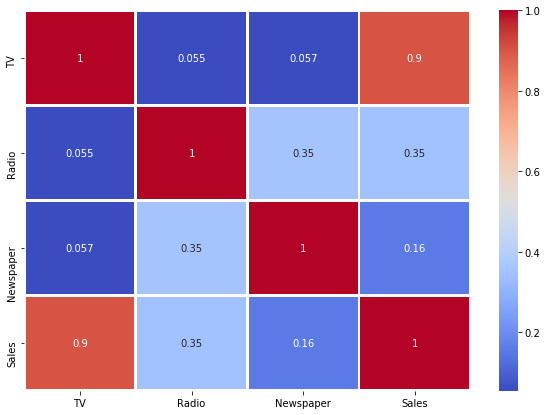

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(ad_data.corr(), annot=True, cmap='coolwarm', linewidths=2)

## Here, we can see that Sales of Tv is highly correlated, so we are creating a scatter plot in the below cell

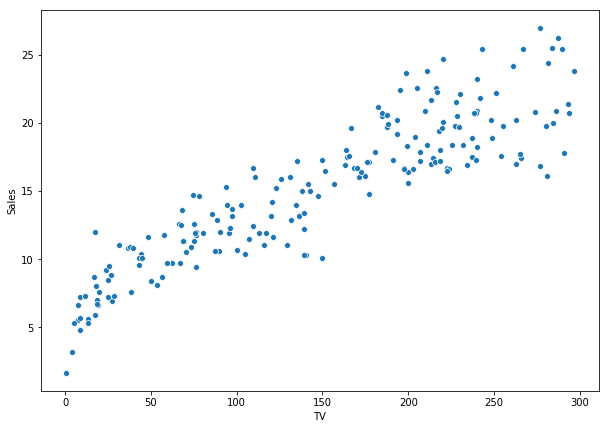

In [8]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='TV', y='Sales', data=ad_data)

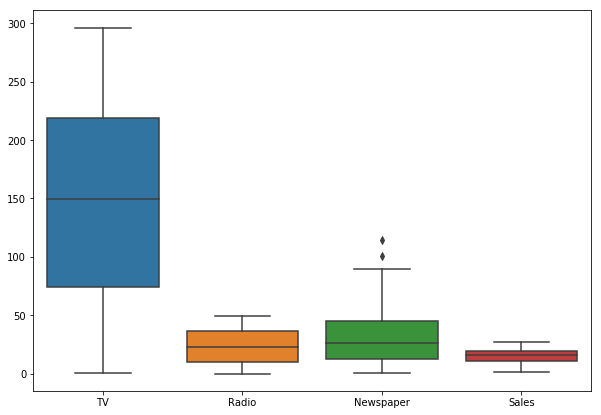

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(data=ad_data)

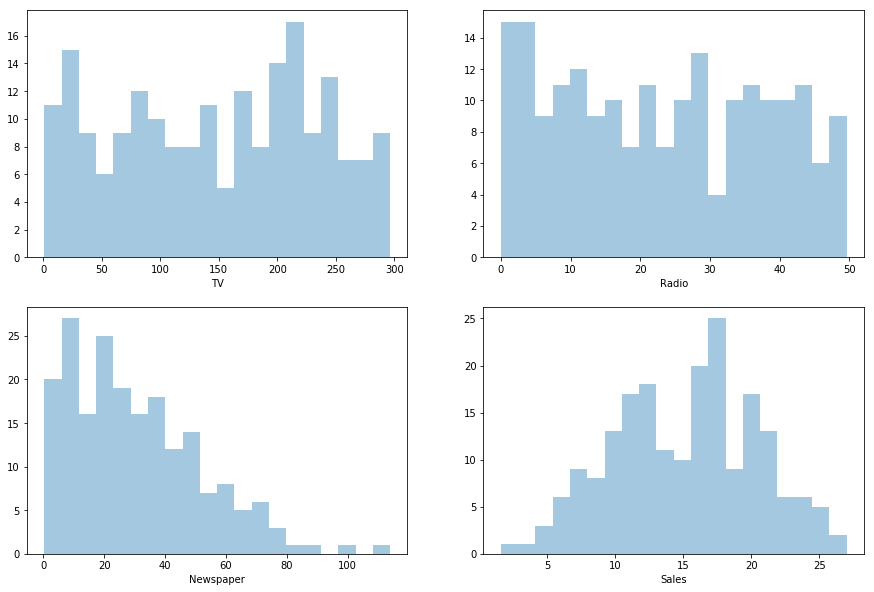

In [10]:
ax, fig = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax1= plt.subplot(2,2,1) 
ax2= plt.subplot(2,2,2) 
ax3= plt.subplot(2,2,3) 
ax4= plt.subplot(2,2,4) 
sns.distplot(ad_data['TV'], bins=20, kde=False, ax=ax1)
sns.distplot(ad_data['Radio'], bins=20, kde=False, ax=ax2)
sns.distplot(ad_data['Newspaper'], bins=20, kde=False, ax=ax3)
sns.distplot(ad_data['Sales'], bins=20, kde=False, ax=ax4)

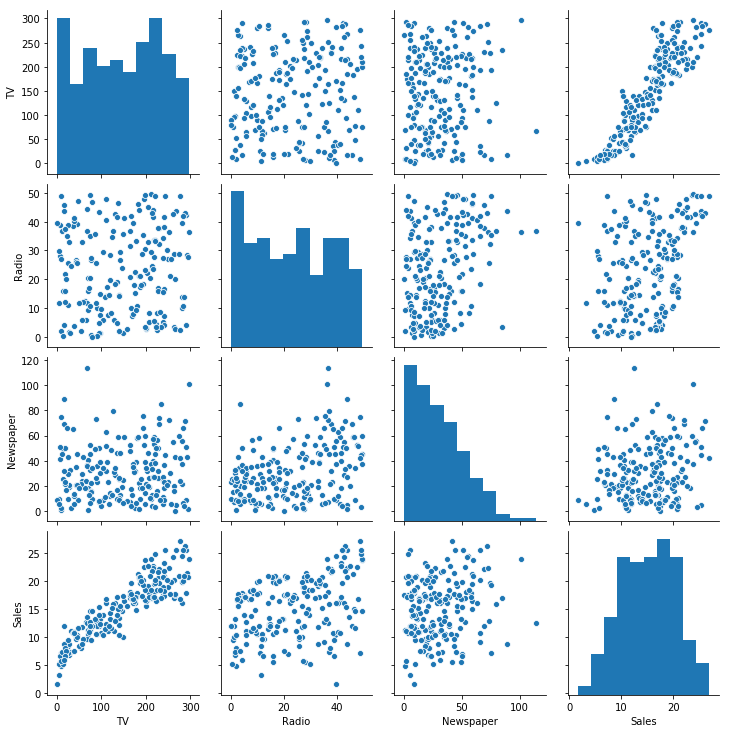

In [11]:
sns.pairplot(ad_data)

/usr/lib/python3/dist-packages/pandas/plotting/_core.py:2257: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4513d6850>,
      dtype=object)

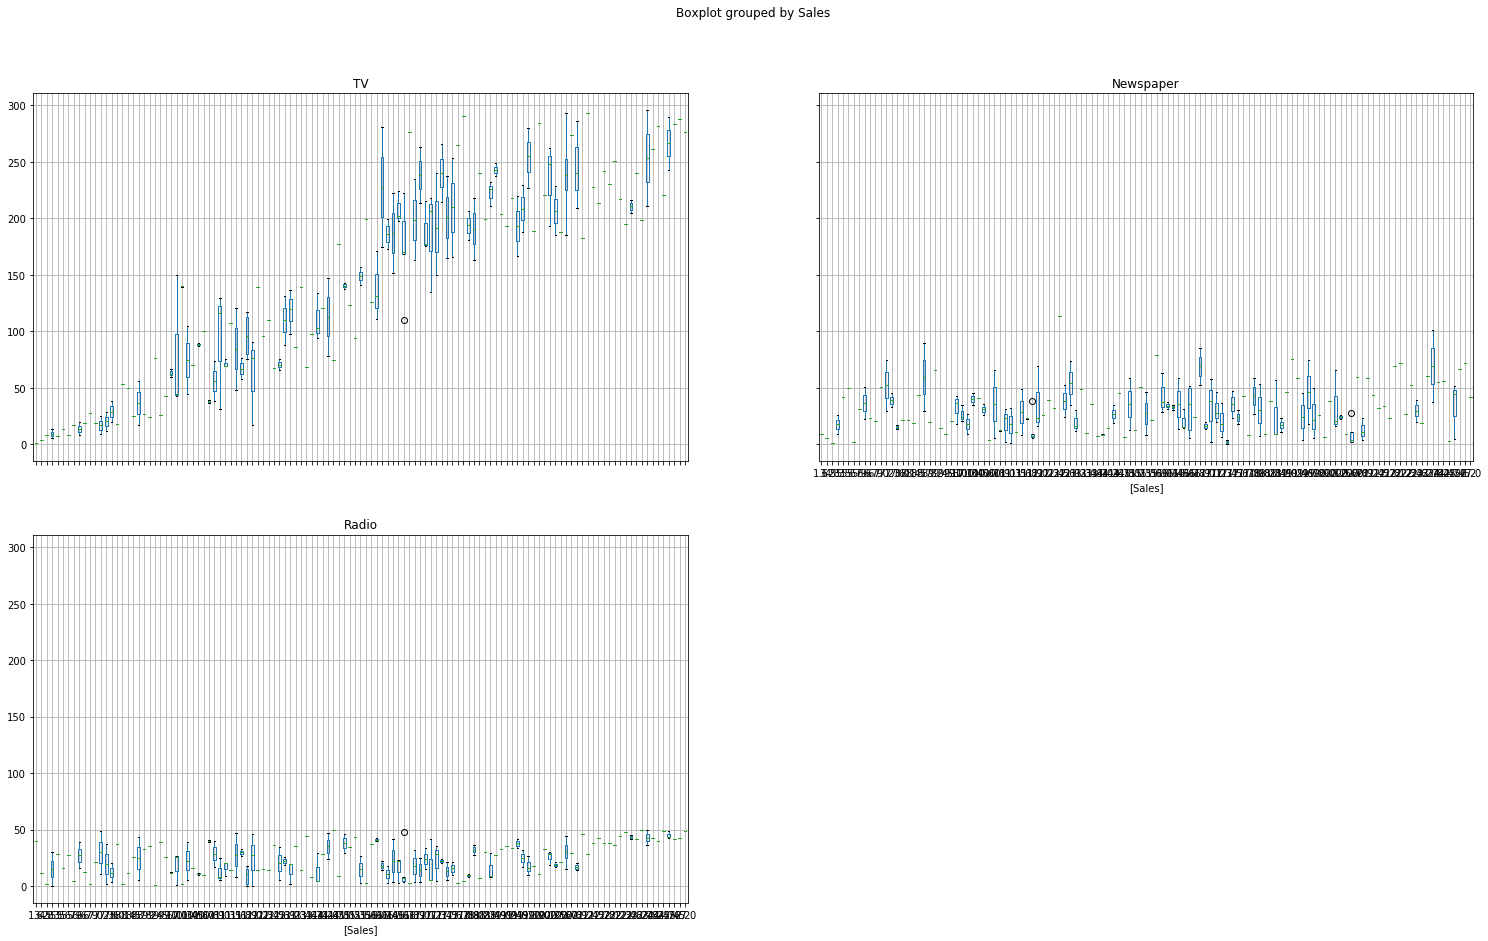

In [12]:
ax, fig = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ad_data.boxplot(column=['TV', 'Newspaper', 'Radio'], by=['Sales'], ax=ax1)

# Linear Regression Model

## Since, we know that linear regression works on least square method. So, first we develop our model than we will check it by using standard liberary

In [13]:
# calcultaing slope and intercept values
def slope_inter(x, y):
    slope = (((np.mean(x) * np.mean(y)) - np.mean(x*y)) / (np.mean(x)**2 - np.mean(x**2))).round(2)
    intercept = (np.mean(y) - np.mean(x) * slope).round(2)
    return slope, intercept

In [14]:
cal_data = {}
columns = ad_data.columns
for i in range(len(columns[:-1])):
    cal_data[columns[i]] = {'slope': slope_inter(ad_data[columns[i]].astype(np.float), ad_data['Sales'])[0], 
                            'intercept':slope_inter(ad_data[columns[i]].astype(np.float), ad_data['Sales'])[1]
                            }

## Our calculated values

In [15]:
cal_data

{'TV': {'slope': 0.06, 'intercept': 6.31},
 'Radio': {'slope': 0.12, 'intercept': 12.34},
 'Newspaper': {'slope': 0.04, 'intercept': 13.91}}

In [16]:
# checking with std library
std_data = {}
columns = ad_data.columns
for i in range(len(columns[:-1])):
    std_data[columns[i]] = {'slope': linregress(ad_data[columns[i]].astype(np.float), ad_data['Sales'])[0].round(2), 
                            'intercept':linregress(ad_data[columns[i]].astype(np.float), ad_data['Sales'])[1].round(2),
                            'r-squared':linregress(ad_data[columns[i]].astype(np.float), ad_data['Sales'])[2].round(2)
                            }

## Standard calculated values

In [17]:
std_data

{'TV': {'slope': 0.06, 'intercept': 6.97, 'r-squared': 0.9},
 'Radio': {'slope': 0.12, 'intercept': 12.24, 'r-squared': 0.35},
 'Newspaper': {'slope': 0.04, 'intercept': 13.96, 'r-squared': 0.16}}

## generate a linear plot

In [18]:
def generate_x(feature):
    xmin, xmax = np.min(feature), np.max(feature)
    return np.linspace(xmin-5, xmax+5, 100)

In [19]:
def generate_liner_plot(columns, data, cal_data):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6)) 
    for i in range(len(columns[:-1])):
        x = generate_x(data[columns[i]])
        plt.subplot(1, 3, i+1)
        slope = cal_data[columns[i]]['slope']
        intercept = cal_data[columns[i]]['intercept']
        plt.scatter(data[columns[i]], data['Sales'])
        plt.plot(x, x*slope + intercept, label= "slope: {0} | intercept {1}".format(slope, intercept))
        plt.legend()
        plt.xlabel(columns[i])
        plt.ylabel('Sales')

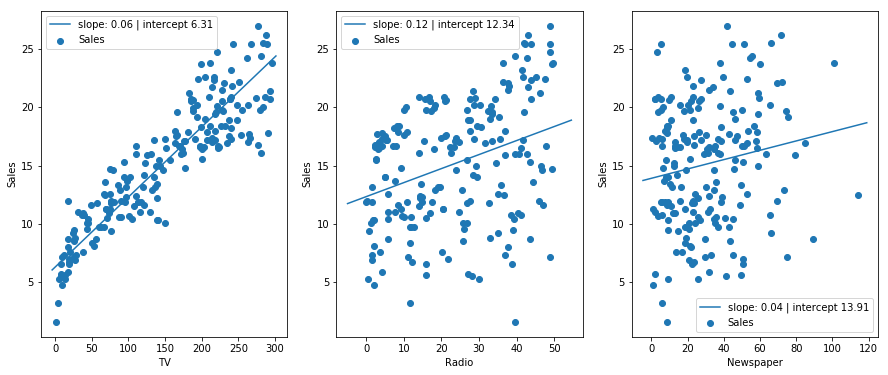

In [20]:
generate_liner_plot(ad_data.columns, ad_data, cal_data)

## finding coefficient error

In [21]:
def stat_ols(x, y):
    model = sm.OLS(y, x)
    results = model.fit()
    print('----------------------\n')
    print(results.summary())

In [22]:
for i in range(len(columns[:-1])):
    stat_ols(ad_data[columns[i]], ad_data['Sales'])

----------------------

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              2714.
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                   6.42e-118
Time:                        10:44:04   Log-Likelihood:                         -570.23
No. Observations:                 200   AIC:                                      1142.
Df Residuals:                     199   BIC:                                      1146.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [23]:
mse_data= {}
def cal_mse(columns, y, n, col_data, data):
    for i in range(len(columns[:-1])):
        x = data[columns[i]]
        slope = col_data[columns[i]]['slope']
        intercept = col_data[columns[i]]['intercept']
        ypredict = x*slope + intercept
        mse_data[columns[i]] = ((1/(2*n))*(np.sum((ypredict-y) ** 2))).round(2)

In [24]:
cal_mse(columns, ad_data['Sales'], len(ad_data), cal_data, ad_data)

In [25]:
print("Calculated mean squared error")
for k,v in mse_data.items():
    print("{0} -> {1}".format(k, v))

Calculated mean squared error
TV -> 2.68
Radio -> 12.19
Newspaper -> 13.54


## finding R Squared

In [26]:
def r_squared(x, y, params):
    ybar = np.mean(y)
    ymodel = x*params[0] + params[1]
    ssreg = np.sum((ymodel - ybar)**2)
    sstot = np.sum((y - ybar)**2)
    return (ssreg / sstot).round(2)

In [27]:
r_square_data = {}
for i in range(len(columns[:-1])):
    slope, intercept = cal_data[columns[i]]['slope'], cal_data[columns[i]]['intercept']
    r_square_data[columns[i]] = r_squared(ad_data[columns[i]], ad_data['Sales'], (slope, intercept))

In [28]:
r_square_data

{'TV': 0.95, 'Radio': 0.11, 'Newspaper': 0.03}

## we can clearly see that TV channel contribute more to the sales as compare to other. Also, Newspaper channel contribution is lowest among all the advertisement channels.

# Calculating result with the help of Standard library

In [29]:
model = LinearRegression()
r_model = LinearRegression()
n_model = LinearRegression()

## TV

In [30]:
x = ad_data['TV'].values.reshape(-1,1)
y = ad_data['Sales'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)

In [31]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
predict = model.predict(X_test).round(2)

In [33]:
print(mean_squared_error(y_test, predict).round(2))

5.49


## Radio

In [34]:
x = ad_data['Radio'].values.reshape(-1,1)
y = ad_data['Sales'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)

In [35]:
r_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
predict = r_model.predict(X_test).round(2)

In [37]:
print(mean_squared_error(y_test, predict).round(2))

28.42


## Newspaper

In [38]:
x = ad_data['Newspaper'].values.reshape(-1,1)
y = ad_data['Sales'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)

In [39]:
n_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
predict = n_model.predict(X_test).round(2)

In [41]:
print(mean_squared_error(y_test, predict).round(2))

28.67


## Regression Assumptions

In [133]:
def draw_regplot(columns, data):
    fig,axes = plt.subplots(3,3,figsize=(12,6))
    for i in range(len(columns[:-1])):
        sns.regplot(x=columns[i], y='Sales', data=data, ax= plt.subplot(3,3,i))
        sns.residplot(x=columns[i], y='Sales', data=data, ax= plt.subplot(3,3,i ** 2))
plt.tight_layout()
# ax[3][3][1].set_title('Regression plot')
# ax[3][3][2].set_title('Residual plot')

<Figure size 432x288 with 0 Axes>

ValueError: num must be 1 <= num <= 9, not 0

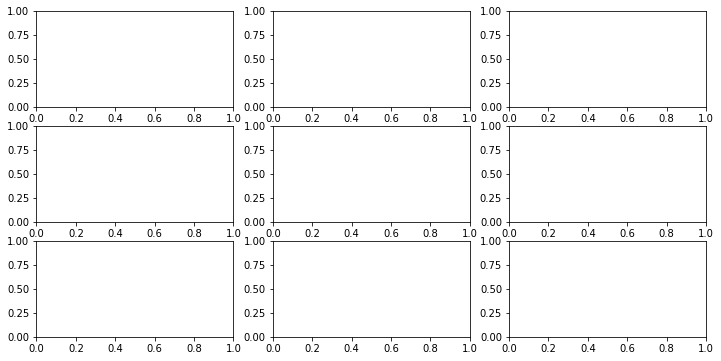

In [134]:
draw_regplot(columns, ad_data)